## Initialization chrome driver

I need to manually install chromedriver in Google Colab because Colab does not come with it pre-installed. As Colab's default runtime was changed from Ubuntu 18.04 LTS to Ubuntu 20.04 LTS, and chromium-browser is no longer distributed outside of the snap package. So the old method of installing Chromium via APT no longer works. By manually downloading the Chrome and chromedriver binaries, we can get around this issue and still use Selenium with Chrome in Colab notebooks.

Reference: https://dev.classmethod.jp/articles/google-colaboratory-use-selenium/

In [1]:
%%shell

# 更新を実行
sudo apt -y update

# ダウンロードのために必要なパッケージをインストール
sudo apt install -y wget curl unzip
# 以下はChromeの依存パッケージ
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb

# Chromeのインストール
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb

# Chrome Driverのインストール
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [553 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,330 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,398 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,274 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports/main amd64 Packages [78.3 kB]
Get:1

### Install selenium

In [2]:
!pip install selenium
!pip install webdriver-manager

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00


In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

options = Options()
options.add_argument("--headless")
options.add_argument('--disable-dev-shm-usage')
options.add_argument("--no-sandbox")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)


## Scraping the data and save to csv

In [4]:
import pandas as pd
from selenium.webdriver.common.by import By


# Initialize the DataFrame
df = pd.DataFrame(columns=["YEAR", "TIMES", "N1", "N2", "N3", "N4", "N5", "N6", "S1"])

# Iterate over the years
for year in range(2003, 2024):  # 2024 is not included in the range
    # Open the webpage
    driver.get(f"http://www.nfd.com.tw/house/year/{year}.htm")

    # Scrape the data
    data = []
    table = driver.find_element(By.XPATH, "//table")  # adjust the xpath to match the actual table
    for row in table.find_elements(By.XPATH, ".//tr"):
        cols = row.find_elements(By.XPATH, ".//td")
        data.append([col.text for col in cols])

    # Convert data to DataFrame and append to the main DataFrame
    df_year = pd.DataFrame(data, columns=["YEAR", "TIMES", "N1", "N2", "N3", "N4", "N5", "N6", "S1"])
    df = df.append(df_year, ignore_index=True)

driver.quit()

# Save the DataFrame as CSV
df.to_csv("data.csv", index=False)


<ipython-input-4-d394dd9c3420>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_year, ignore_index=True)
<ipython-input-4-d394dd9c3420>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_year, ignore_index=True)
<ipython-input-4-d394dd9c3420>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_year, ignore_index=True)
<ipython-input-4-d394dd9c3420>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_year, ignore_index=True)
<ipython-input-4-d394dd9c3420>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

## Import Module

In [5]:
import gc
import os
import math
import numpy as np
import pandas as pd
from numpy import sqrt, sin, cos, pi, zeros
from numpy.random import randn, rand, uniform, normal
from scipy.linalg import hadamard
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Activation, LSTM, Dropout, RepeatVector, TimeDistributed, Embedding, Reshape, Dot, Concatenate
from tensorflow.keras.layers import GRU, SpatialDropout1D, Conv1D, GlobalMaxPooling1D,Multiply, Lambda, Softmax, Flatten, BatchNormalization, Bidirectional, dot, concatenate
from tensorflow.keras.layers import AdditiveAttention, Attention
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks
from tensorflow.keras import backend
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import MeanSquaredError
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE

Tensorflow version 2.12.0


## Load Mark6 Lottery history


In [6]:
df = pd.read_csv('data.csv')

# date cleaning
df = df[df['YEAR'] != "YEAR"]
df = df[df['YEAR'] != "新冠疫情.七個月未開  2020 / 02 / 01~2020 / 09 / 24"]
df.to_csv('data.csv', index=False)
df.tail()

,YEAR,TIMES,N1,N2,N3,N4,N5,N6,S1
2914,2023,114,01,12,22,23,34,39,30
2915,2023,115,02,13,23,28,30,31,03
2916,2023,116,01,29,31,42,47,48,40
2917,2023,117,08,18,24,34,41,42,31
2918,2023,118,01,13,18,32,34,49,44


In [7]:
df = df.drop(columns=["YEAR", "TIMES"])

In [8]:
df = df.astype(int)

## Split the times series data

In [9]:
data = df.values - 1
train = data[:-50]
test = data[-50:]

w = 15
X_train = []
y_train = []
for i in range(w, len(train)):
    X_train.append(train[i - w: i, :])
    y_train.append(train[i])
X_train, y_train = np.array(X_train), np.array(y_train)

inputs = data[data.shape[0] - test.shape[0] - w:]
X_test = []
for i in range(w, inputs.shape[0]):
    X_test.append(inputs[i - w: i, :])
X_test = np.array(X_test)
y_test = test

In [10]:
print(data.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2897, 7)
(2832, 15, 7)
(2832, 7)
(50, 15, 7)
(50, 7)


## Modeling setup

In [11]:
embed_dim = (59 // 2) + 1
dropout_rate = 0.5
spatial_dropout_rate = 0.5
steps_before = w
steps_after = 7
feature_count = embed_dim * 7
hidden_neurons = [64, 32]
bidirectional = True
attention_style = 'Bahdanau'

In [12]:
import tensorflow as tf
from tensorflow.keras import regularizers

# Create an instance of MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():

    inp0 = Input(shape = (w, X_train.shape[2]))

    inp1 = Lambda(lambda x: x[:, :, 0])(inp0)
    inp1 = Embedding(49, embed_dim)(inp1)
    inp1 = SpatialDropout1D(spatial_dropout_rate)(inp1)

    inp2 = Lambda(lambda x: x[:, :, 1])(inp0)
    inp2 = Embedding(49, embed_dim)(inp2)
    inp2 = SpatialDropout1D(spatial_dropout_rate)(inp2)

    inp3 = Lambda(lambda x: x[:, :, 2])(inp0)
    inp3 = Embedding(49, embed_dim)(inp3)
    inp3 = SpatialDropout1D(spatial_dropout_rate)(inp3)

    inp4 = Lambda(lambda x: x[:, :, 3])(inp0)
    inp4 = Embedding(49, embed_dim)(inp4)
    inp4 = SpatialDropout1D(spatial_dropout_rate)(inp4)

    inp5 = Lambda(lambda x: x[:, :, 4])(inp0)
    inp5 = Embedding(49, embed_dim)(inp5)
    inp5 = SpatialDropout1D(spatial_dropout_rate)(inp5)

    inp6 = Lambda(lambda x: x[:, :, 5])(inp0)
    inp6 = Embedding(49, embed_dim)(inp6)
    inp6 = SpatialDropout1D(spatial_dropout_rate)(inp6)

    inp7 = Lambda(lambda x: x[:, :, 6])(inp0)
    inp7 = Embedding(49, embed_dim)(inp7)
    inp7 = SpatialDropout1D(spatial_dropout_rate)(inp7)

    inp = Concatenate()([inp1, inp2, inp3, inp4, inp5, inp6, inp7])

    # Seq2Seq model with attention or bidirectional encoder

    num_layers = len(hidden_neurons)

    sh_list, h_list, c_list = [inp], [], []

    if bidirectional:

        for i in range(num_layers):

            sh, fh, fc, bh, bc = Bidirectional(LSTM(hidden_neurons[i],
                                                    dropout = dropout_rate,
                                                    return_state = True,
                                                    return_sequences = True,
                                                    kernel_regularizer=tf.keras.regularizers.l2(1e-4),
                                                    recurrent_regularizer=tf.keras.regularizers.l2(1e-4))

                                                    )(sh_list[-1])

            h = Concatenate()([fh, bh])
            c = Concatenate()([fc, bc])

            sh_list.append(sh)
            h_list.append(h)
            c_list.append(c)

    else:

        for i in range(num_layers):

            sh, h, c = LSTM(hidden_neurons[i],
                            dropout = dropout_rate,
                            return_state = True,
                            return_sequences = True,
                            kernel_regularizer=tf.keras.regularizers.l2(1e-4),
                            recurrent_regularizer=tf.keras.regularizers.l2(1e-4)
                            )(sh_list[-1])

            sh_list.append(sh)
            h_list.append(h)
            c_list.append(c)

    decoder = RepeatVector(steps_after)(h_list[-1])

    if bidirectional:

        decoder_hidden_neurons = [hn * 2 for hn in hidden_neurons]

    else:

        decoder_hidden_neurons = hidden_neurons

    for i in range(num_layers):

        decoder = LSTM(decoder_hidden_neurons[i],
                       dropout = dropout_rate,
                       return_sequences = True)(decoder, initial_state = [h_list[i], c_list[i]])

    if attention_style == 'Bahdanau':

        context = AdditiveAttention(dropout = dropout_rate)([decoder, sh_list[-1]])

        decoder = concatenate([context, decoder])

    elif attention_style == 'Luong':

        context = Attention(dropout = dropout_rate)([decoder, sh_list[-1]])

        decoder = concatenate([context, decoder])

    out = Dense(49, activation = 'softmax')(decoder)

    model = Model(inputs = inp0, outputs = out)

    sparse_top_k = tf.keras.metrics.SparseTopKCategoricalAccuracy(k = 5, name = 'sparse_top_k')

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[sparse_top_k])

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15, 7)]      0           []                               
                                                                                                  
 lambda (Lambda)                (None, 15)           0           ['input_1[0][0]']                
                                                                                                  
 lambda_1 (Lambda)              (None, 15)           0           ['input_1[0][0]']                
                                                                                                  
 lambda_2 (Lambda)              (None, 15)           0           ['input_1[0][0]']                
                                                                                              

In [14]:
class CosineAnnealingScheduler(callbacks.Callback):
    """Cosine annealing scheduler.
    """

    def __init__(self, T_max, eta_max, eta_min = 0, verbose = 0):
        super(CosineAnnealingScheduler, self).__init__()
        self.T_max = T_max
        self.eta_max = eta_max
        self.eta_min = eta_min
        self.verbose = verbose

    def on_epoch_begin(self, epoch, logs = None):
        if not hasattr(self.model.optimizer, 'lr'):
            raise ValueError('Optimizer must have a "lr" attribute.')
        lr = self.eta_min + (self.eta_max - self.eta_min) * (1 + math.cos(math.pi * epoch / self.T_max)) / 2
        backend.set_value(self.model.optimizer.lr, lr)
        if self.verbose > 0:
            print('\nEpoch %05d: CosineAnnealingScheduler setting learning '
                  'rate to %s.' % (epoch + 1, lr))

    def on_epoch_end(self, epoch, logs = None):
        logs = logs or {}
        logs['lr'] = backend.get_value(self.model.optimizer.lr)

## Model Fit

In [15]:
EPOCHS = 1000
BATCH_SIZE = 64
LR_MAX = 1e-3
LR_MIN = 1e-4

cas = CosineAnnealingScheduler(EPOCHS, LR_MAX, LR_MIN)

ckp = callbacks.ModelCheckpoint('best_model.hdf5', monitor = 'val_sparse_top_k', verbose = 0,
                                save_best_only = True, save_weights_only = False, mode = 'max')

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks = [ckp, cas],
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    verbose = 0)

hist = pd.DataFrame(history.history)

In [16]:
model.load_weights('best_model.hdf5')
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 2)

2/2 [==============================] - 3s 20ms/step


In [17]:
loss_and_metrics = model.evaluate(X_test, y_test)
loss_and_metrics

2/2 [==============================] - 0s 23ms/step - loss: 3.3307 - sparse_top_k: 0.3343


[3.330723285675049, 0.334285706281662]

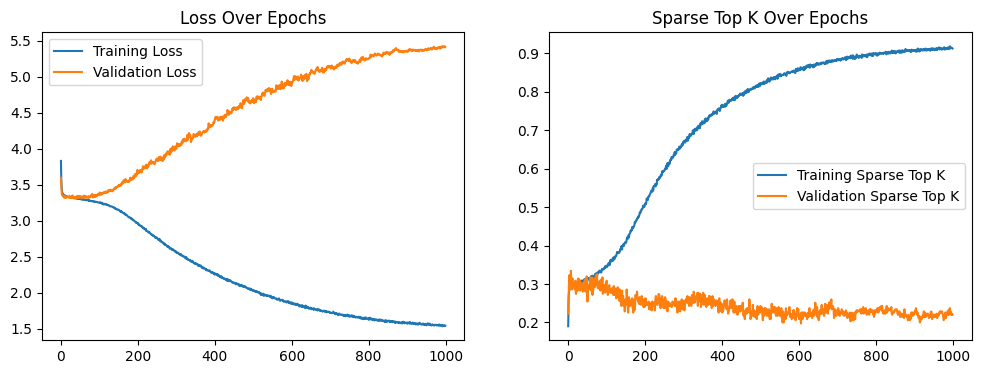

In [18]:
import matplotlib.pyplot as plt

# Plotting training loss and sparse top k
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['sparse_top_k'], label='Training Sparse Top K')
plt.plot(history.history['val_sparse_top_k'], label='Validation Sparse Top K')
plt.legend()
plt.title('Sparse Top K Over Epochs')

plt.show()

## Predict of next draw

In [19]:
X_latest = np.array([data[-w:, :]])
pred_latest = model.predict(X_latest)
pred_latest = np.squeeze(pred_latest)
pred_latest_greedy = np.argmax(pred_latest, axis = 1)
print(pred_latest_greedy + 1)

1/1 [==============================] - 0s 130ms/step
[ 1 10 17 30 38 49 10]
